# Chapter 7 Working with Keras : A deep dive

## 7.1 A spectrum of workflows

The design of the Keras API is guided by the principle of progressive disclosure of complexity:

make it easy to get started, yet make it possible to handle high-complexity use
cases, only requiring incremental learning at each step

As such, there’s not a single “true” way of using Keras. Rather, Keras offers a spectrum of workflows, from the very simple to the very flexible.

## 7.2 Different ways to build Keras models

1.  The Sequential model, the most approachable API—it’s basically a Python list. As
such, it’s limited to simple stacks of layers.


2.  The Functional API, which focuses on graph-like model architectures. It represents a nice mid-point between usability and flexibility, and as such, it’s the
most commonly used model-building API.


3. Model subclassing, a low-level option where you write everything yourself from
scratch. This is ideal if you want full control over every little thing. However, you
won’t get access to many built-in Keras features, and you will be more at risk of
making mistakes

### 7.2.1 The Sequential Model

Listing 7.1

In [80]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
                        layers.Dense(64,activation="relu"),
                        layers.Dense(10,activation='softmax')
                        ])

Note that it is possible to build the same model via the __add()__ method

List 7.2

In [81]:
model = keras.Sequential()
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

Because the shape of the layers' weights depends
on the shape of their input: until the input shape is known, they can’t be created.

List 7.3

In [82]:
# model.weights

As such, the preceding Sequential model does not have any weights (listing 7.3)
 until you actually call it on some data, or call its build() method with an input shape


Listing 7.4 Calling a model for the first time to build it

In [83]:
model.build(input_shape=(None,3))
model.weights[0][0]
## Builds the model . now the model will expect samples of shape(,3). 
## The None in the input shape signals that the batch size could be anything

<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([-2.31768191e-01,  1.59104764e-02, -1.27363801e-02,  2.24283755e-01,
       -1.16306439e-01, -5.14221638e-02, -1.96475476e-01, -2.26579040e-01,
       -2.60586292e-01,  1.02904111e-01, -1.26283467e-02,  1.62608504e-01,
       -2.16423303e-01,  2.17685878e-01, -1.22379825e-01, -2.97710359e-01,
       -1.18910119e-01,  3.03725302e-02, -6.11349046e-02,  5.04065454e-02,
       -2.56883621e-01, -2.81691074e-01, -1.46307960e-01,  2.96746194e-02,
       -2.86762238e-01, -6.82295412e-02,  2.10208356e-01,  1.00369424e-01,
       -2.27219790e-01,  2.97133923e-01,  1.25747561e-01, -1.95672333e-01,
        1.36152655e-01,  2.28415132e-02,  1.02441996e-01,  2.71201134e-06,
       -2.88542688e-01, -2.65041292e-01,  1.37620330e-01,  7.84570575e-02,
        2.22178578e-01, -2.33627647e-01,  1.65701121e-01, -2.23788768e-01,
        1.05801225e-02,  1.27418220e-01,  2.29496717e-01, -1.55945510e-01,
       -1.02550164e-01, -2.37682909e-01,  1.04836643e

After the model has been builted , you can display its contents via __summary()__ method

Listing 7.5 

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                256       
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


As you can see, this model has a name of "sequential_2" You can give names to everything in Keras

Listing 7.6 Naming models and layers

In [85]:
model= keras.Sequential(name="wyn_model")
model.add(layers.Dense(64,activation='relu',name = 'First_layer_wyn'))
model.add(layers.Dense(10,activation='softmax',name = 'Second_layer_wyn'))

model.build((None,3))

model.summary()

Model: "wyn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer_wyn (Dense)     (None, 64)                256       
                                                                 
 Second_layer_wyn (Dense)    (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


When building a Sequential model incrementally, it’s useful to be able to print a summary of what the current model looks like after you add each layer. 

But you can’t print a summary until the model is built! 

There’s actually a way to have your Sequential
built on the fly: just declare the shape of the model’s inputs in advance.

Listing 7.7 Specifying the input shape of your model in advance

Use Input to declare the shape 
of the inputs. 

Note that the shape argument must be the 
shape of each sample, not  the shape of one batch.

In [86]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64,activation='relu'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                256       
                                                                 
 dense_34 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7.2.2 The Functional API

The Sequential model is easy to use, but its applicability is extremely limited: it can
only express models with a single input and a single output, applying one layer after
the other in a sequential fashion.

 In such cases, you’d build your model using the Functional API. This is what most
Keras models you’ll encounter in the wild use.

#### A Simple Example

The stack of two layers we used. 

Its Functional API verison looks like following listing

Listing 7.8 

In [88]:
inputs = keras.Input(shape=(3,),name='my_input')

features = layers.Dense(64,activation='relu')(inputs)

outputs = layers.Dense(10,activation='softmax')(features)

model = keras.Model(inputs= inputs,outputs=outputs)

Let's go it over step by step

We started by declaring an Input (note that you can also give names to these input
objects, like everything else)

The model will process batches where each sample 
has shape (3,). The number of samples per batch is 
variable (indicated by the None batch size).

In [89]:
inputs = keras.Input(shape=(3,),name='my_input')

We call such an object a symbolic tensor. 

It doesn’t contain any actual data, but it
encodes the specifications of the actual tensors of data that the model will see when
you use it. 

It stands for future tensors of data.

Next, we created a layer and __called it on__ the input

In [90]:
features = layers.Dense(64, activation="relu")(inputs)

All Keras layers can be called both on real tensors of data and on these symbolic tensors. In the latter case, they return a new symbolic tensor, with updated shape and
dtype information:

In [91]:
features.shape

TensorShape([None, 64])

After obtaining the final outputs, we instantiated the model by specifying its inputs
and outputs in the Model constructor:

In [92]:
outputs = layers.Dense(10,activation='softmax')(features)

In [93]:
models = keras.Model(inputs= inputs,outputs = outputs)

Here is the summary of the model

In [94]:
models.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_37 (Dense)            (None, 64)                256       
                                                                 
 dense_38 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### MULTI-INPUT, MULTI-OUTPUT MODELS

Unlike this toy model, most deep learning models don’t look like lists—they look like
graphs. They may, for instance, have multiple inputs or multiple outputs. It’s for this
kind of model that the Functional API really shines.


Let’s say you’re building a system to rank customer support tickets by priority and
route them to the appropriate department. Your model has three inputs:
1. The title of the ticket (text input)
2. The text body of the ticket (text input)
3. Any tags added by the user (categorical input, assumed here to be one-hot
encoded

Your model also has two outputs:
1. The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
2. The department that should handle the ticket (a softmax over the set of departments)

Listing 7.9 A multi-input, multi-output Functional model

In [95]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4


title = keras.Input(shape=(vocabulary_size,),name='title')
text_body = keras.Input(shape=(vocabulary_size,),name='text_body')
tags = keras.Input(shape=(num_tags,),name='tags')

features = layers.Concatenate()([title,text_body,tags])
features = layers.Dense(64,activation='relu')(features)

priority = layers.Dense(1,activation='sigmoid',name='priority')(features)

department = layers.Dense(num_departments,activation='softmax',name='department')(features)

model = keras.Model(inputs=[title,text_body,tags],outputs=[priority,department])

model.summary()


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',       

Listing 7.10 Training a model by providing lists of input and target arrays

You can train your model in much the same way as you would train a Sequential
 model, by calling fit() with __lists of input and output data__. 


These lists of data should
 be in __the same order__ as the inputs you passed to the Model constructor

In [96]:
import numpy as np

num_samples = 1280

## X_train : 3 inputs
title_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))

text_body_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))


tags_data = np.random.randint(0,2,size=(num_samples,num_tags))

## y_train : 2 outputs
priority_data = np.random.random(size=(num_samples,1))

department_data = np.random.randint(0,2,size=(num_samples,num_departments))


model.compile(optimizer=keras.optimizers.RMSprop(),
                loss = keras.losses.CategoricalCrossentropy(),
                metrics  = [['mean_absolute_error'],['accuracy']]
                )

model.fit(
            [title_data,text_body_data,tags_data],
            [priority_data,department_data],
            epochs = 1
)



40/40 [==============================] - 1s 13ms/step - loss: 37.8861 - priority_loss: 0.0000e+00 - department_loss: 37.8861 - priority_mean_absolute_error: 0.4963 - department_accuracy: 0.2398


In [97]:
model.evaluate(
            [title_data,text_body_data,tags_data],
            [priority_data,department_data]
)

40/40 [==============================] - 0s 4ms/step - loss: 34.6284 - priority_loss: 0.0000e+00 - department_loss: 34.6284 - priority_mean_absolute_error: 0.5008 - department_accuracy: 0.2328


[34.62835693359375,
 0.0,
 34.62835693359375,
 0.5007858872413635,
 0.23281249403953552]

In [98]:
priority_predicts , department_predicts = model.predict([title_data,text_body_data,tags_data])
print(priority_predicts)
print(department_predicts)

40/40 [==============================] - 0s 4ms/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[4.4677568e-09 1.0000000e+00 6.3692819e-14 3.8868704e-09]
 [6.7507029e-12 1.0000000e+00 1.2245680e-13 4.6287503e-09]
 [1.0798061e-09 1.0000000e+00 1.7926441e-13 6.7562005e-09]
 ...
 [2.7995314e-10 1.0000000e+00 1.1959819e-13 3.2298988e-08]
 [4.3180401e-10 1.0000000e+00 5.4373054e-14 2.4159837e-08]
 [4.6982310e-11 1.0000000e+00 2.7809108e-13 2.9948353e-08]]


If you don’t want to rely on input order (for instance, because you have many inputs
or outputs), you can also leverage the names you gave to the Input objects and the
output layers, and pass data via dictionaries.

Listing 7.11 Training a model by providing dicts of input and target arrays

In [99]:
model.compile(
            optimizer = keras.optimizers.RMSprop(),
            loss = {'priority':keras.losses.MeanSquaredError(),"department":keras.losses.CategoricalCrossentropy()  },
            metrics = {'priority':['mean_absolute_error'],"department":['accuracy']  },
            
)

model.fit(
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    {"department":department_data,"priority":priority_data}
)


40/40 [==============================] - 1s 12ms/step - loss: 58.3185 - priority_loss: 0.3315 - department_loss: 57.9870 - priority_mean_absolute_error: 0.5008 - department_accuracy: 0.2234


In [100]:
model.evaluate(
            
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    {"department":department_data,"priority":priority_data}
)

40/40 [==============================] - 0s 4ms/step - loss: 25.8255 - priority_loss: 0.3315 - department_loss: 25.4939 - priority_mean_absolute_error: 0.5008 - department_accuracy: 0.6023


[25.82546043395996,
 0.3315175473690033,
 25.49394416809082,
 0.5007858872413635,
 0.602343738079071]

In [101]:
model.predict(
           
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    
)

40/40 [==============================] - 0s 4ms/step


[array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[1.0000000e+00, 6.7124925e-12, 1.3285084e-09, 8.2756779e-12],
        [9.9995196e-01, 1.8930498e-07, 4.7844336e-05, 3.2932437e-08],
        [9.9999964e-01, 1.3233287e-09, 3.6039691e-07, 4.5377116e-10],
        ...,
        [9.9999917e-01, 2.1123503e-09, 8.3468063e-07, 1.0380865e-08],
        [9.9999988e-01, 1.1855007e-09, 8.1621998e-08, 2.0959132e-09],
        [9.9999559e-01, 1.0040586e-08, 4.2611514e-06, 9.8659015e-08]],
       dtype=float32)]

#### THE POWER OF THE FUNCTIONAL API: ACCESS TO LAYER CONNECTIVITY

A Functional model is an explicit graph data structure. This makes it possible to
inspect how layers are connected and reuse previous graph nodes (which are layer
outputs) as part of new models. 

It also nicely fits the “mental model” that most researchers use when thinking about a deep neural network: a graph of layers. This enables
two important use cases: model visualization and feature extraction.

Let’s visualize the connectivity of the model we just defined (the topology of the
model).


You can plot a Functional model as a graph with the __plot_model()__ utility (see
figure 7.2).

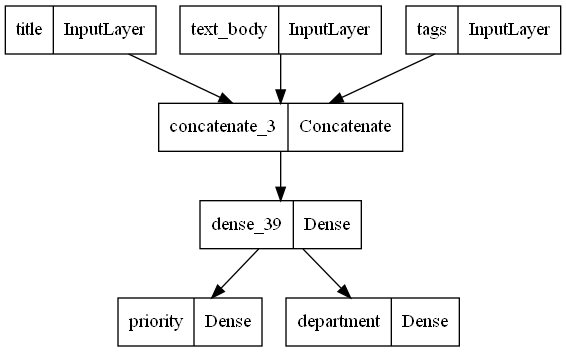

In [102]:
keras.utils.plot_model(model,'Ticket_Classifier.png')

You can also let it show the shape information

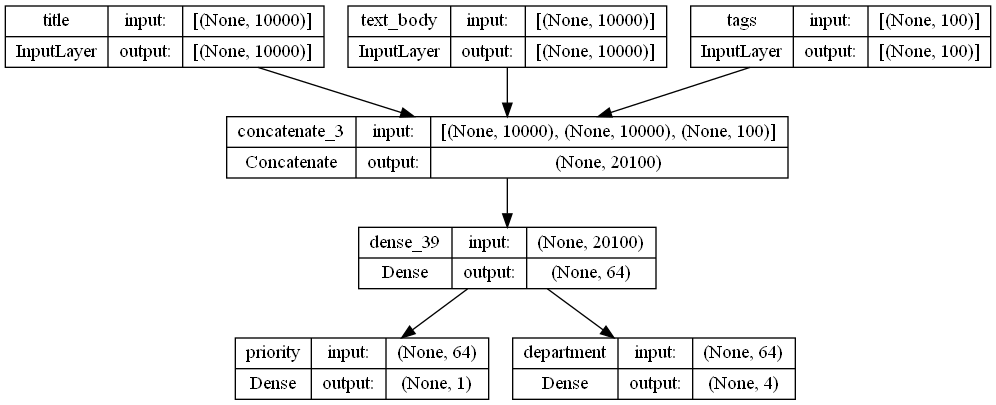

In [103]:
keras.utils.plot_model(model,'Ticket_Classifier_with_shape.png',show_shapes=1)

Access to layer connectivity also means that you can inspect and reuse individual
 nodes (layer calls) in the graph. 
 
 The __model.layers__ model property provides the list
 of layers that make up the model, and for each layer you can query __layer.input__ and
 __layer.output__.

In [104]:
model.layers

See that the __model.layer[3]__ is concatenate, we can check what's in it by __layers.input__ and __layers.output__

In [105]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [106]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_3')>

Let’s say you want to add another output to the previous model—you want to estimate how long a given issue ticket will take to resolve, a kind of difficulty rating. 

You could do this via a classification layer over three categories: “quick,” “medium,” and
“difficult.”

You don’t need to recreate and retrain a model from scratch. You can start
from the intermediate features of your previous model, since you have access to them,
like this

Listing 7.13 Creating a new model by reusing intermediate layer outputs

In [107]:
features= model.layers[4].output

__layers[4]__ is our intermediate 
Dense layer

In [108]:
difficulty = layers.Dense(4,activation='softmax',name='difficulty')(features)

new_model = keras.Model(
          inputs=[title,text_body,tags],outputs=[priority,department,difficulty]
)

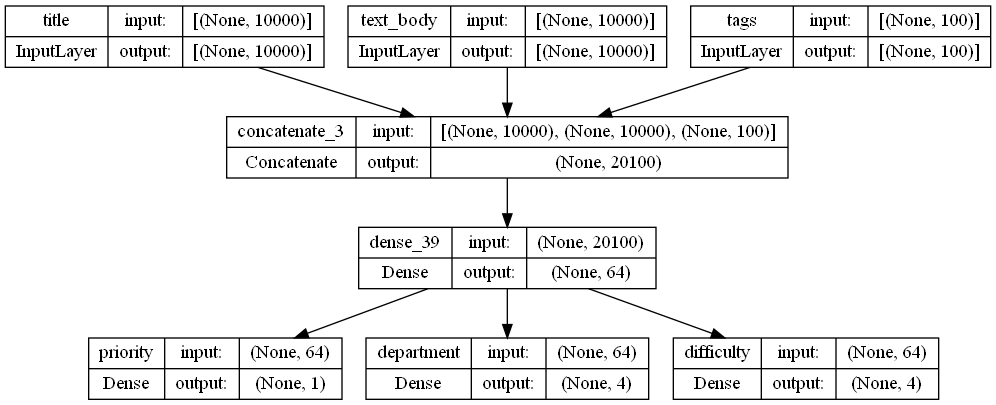

In [109]:
keras.utils.plot_model(new_model,'New_model_with_difficulties.png',show_shapes=1)

###  7.2.3 Subclassing the Model Class

The last model-building pattern you should know about is the most advanced one:

Model subclassing. You learned in chapter 3 how to subclass the Layer class to create
custom layers. Subclassing Model is pretty similar:

1. In the __"__init__()"__ method, define the layers the model will use.

2. In the __call()__ method, define the forward pass of the model, reusing the layers
previously created.

3. Instantiate your subclass, and call it on data to create its weights.

#### REWRITING OUR PREVIOUS EXAMPLE AS A SUBCLASSED MODEL

Listing 7.14 A simple subclassed model

In [110]:
class CostomerTicketModel(keras.Model):
    def __init__(self,num_departments:int):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64,activation='relu')
        self.priority_scorer = layers.Dense(1,activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments,activation='softmax')
    
    def call(self,inputs:dict):
        title = inputs["title"]
        text_body = inputs['text_body']
        tags = inputs['tags']

        features = self.concat_layer([title,text_body,tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority,department

Now let's __init__ the model as this class

In [111]:
model = CostomerTicketModel(num_departments=4)


Then let's __call__ the class

In [112]:
priority,department = model.call(inputs=        
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    )

Or you can __call__ in this way

In [113]:
priority,department = model(inputs=        
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    )

So far, everything looks very similar to Layer subclassing, a workflow you encountered
in chapter 3. What, then, is the difference between a Layer subclass and a Model subclass? It’s simple: a “layer” is a building block you use to create models, and a “model”
is the top-level object that you will actually train, export for inference, etc. 

In short, a
Model has fit(), evaluate(), and predict() methods. Layers don’t. Other than that,
the two classes are virtually identical.

Let's review that how the model bulit before:

"model = keras.Model(inputs=[title,text_body,tags],outputs=[priority,department])"

which means our __call()__method has the same function as "inputs=",but the difference is that we sepcified the output rather than defining it by ourselves in __Model()__

After figuring it out , now we can treat the class as a common model 


You can __compile()__ and train the __model__ just like before

In [114]:
model.compile(optimizer=keras.optimizers.RMSprop(),
                loss = [keras.losses.MeanSquaredError(),keras.losses.CategoricalCrossentropy()],
                metrics = [['mean_absolute_error'],['accuracy']]
 )

The structure of the target 
data must match exactly what is 
returned by the call() method—
here, a list of two elements.

In [115]:
model.fit(  
    {"text_body":text_body_data,'title':title_data,'tags':tags_data},
    [priority_data,department_data],epochs = 1
      )

40/40 [==============================] - 1s 13ms/step - loss: 26.2487 - output_1_loss: 0.3249 - output_2_loss: 25.9239 - output_1_mean_absolute_error: 0.4932 - output_2_accuracy: 0.3156


In [116]:
priority_preds, department_preds = model.predict({"title": title_data,
 "text_body": text_body_data,
 "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


#### BEWARE: WHAT SUBCLASSED MODELS DON’T SUPPORT

This freedom comes at a cost: with subclassed models, you are responsible for more of
the model logic, which means your potential error surface is much larger. 

As a result,
you will have more debugging work to do. You are developing a new Python object,
not just snapping together LEGO bricks.

For instance, because the way layers are connected to each other is hidden inside
 the body of the __call()__ method, you cannot access that information. Calling __summary()__ will not display layer connectivity, and you cannot plot the model topology via
 __plot_model()__

### 7.2.4 Mixing and Matching different components

All models in the Keras API
can smoothly interoperate with each other, whether they’re Sequential models, Functional models, or subclassed models written from scratch. 

They’re all part of the same spectrum of workflows.
 
 
For instance, you can use a subclassed layer or model in a Functional model.

Listing 7.15 Creating a Functional model that includes a subclassed model

In [117]:
class Classifier(keras.Model):
    def __init__(self,num_class=2):
        super().__init__()
        if num_class == 2:
            num_units = 1
            activation = 'sigmoid'
        else :
            num_units = num_class
            activation = 'softmax'
        
        self.dense = layers.Dense(num_units,activation=activation)
    
    def call(self,inputs):
        return self.dense(inputs)
        

In [118]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64,activation='relu')(inputs)
outputs = Classifier(num_class=10)(features)
model  =keras.Model(inputs= inputs,outputs= outputs)

Inversely, you can use a Functional model as part of a subclassed layer or model.

Listing 7.16 Creating a subclassed model that includes a Functional model

In [119]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1,activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs,outputs=outputs)


In [120]:
class MyModel(keras.Model):
    def __init__(self,num_class = 2):
        super().__init__()
        self.dense = layers.Dense(64,activation='relu')
        self.classifier= binary_classifier
    def call(self,inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()(inputs)

In the book it was typed as 

model = MyModel()

but I suggusted it should be 

model = Mymodel()(inputs)

### 7.2.5 Remember: Use the right tool for the job

 In general, the Functional API provides you with a pretty good trade-off between
ease of use and flexibility. 

It also gives you direct access to layer connectivity, which is
very powerful for use cases such as model plotting or feature extraction. If you can use
the Functional API—that is, if your model can be expressed as a directed acyclic graph
of layers—I recommend using it over model subclassing

 Going forward, all examples in this book will use the Functional API, simply
because all the models we will work with are expressible as graphs of layers. We will,
however, make frequent use of subclassed layers. 


In general, using Functional models
that include subclassed layers provides the best of both worlds: high development flexibility while retaining the advantages of the Functional API

## 7.3 Using built-in training and evaluation loops

Keras provides you with different workflows for training models. 

They can be as simple as calling fit() on your data, or as advanced as writing a new training algorithm from scratch

Listing 7.17 The standard workflow: compile(), fit(), evaluate(), predict()

In [121]:
from keras.datasets import mnist
import numpy as np
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512,activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10,activation='softmax')(features)
    model = keras.Model(inputs=inputs,outputs=outputs)
    return model


In [125]:
(images,labels),(test_images,test_labels) = mnist.load_data()

images = images.reshape((60000,28*28))
images = images.astype('float32')/255


test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

train_images,val_images = images[10000:],images[:10000]


train_labels,val_labels = labels[10000:],labels[:10000]

In [128]:
model = get_mnist_model()
model.compile(
            optimizer = keras.optimizers.RMSprop(),
            loss = keras.losses.SparseCategoricalCrossentropy(),
            metrics = ['accuracy']
)


In [129]:
model.fit(train_images,train_labels,
            epochs = 3,
            validation_data = (val_images,val_labels)
            
            )


Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2903 - accuracy: 0.9142 - val_loss: 0.1511 - val_accuracy: 0.9564
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1646 - accuracy: 0.9541 - val_loss: 0.1216 - val_accuracy: 0.9677
Epoch 3/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1353 - accuracy: 0.9641 - val_loss: 0.1119 - val_accuracy: 0.9715


In [130]:
test_metric = model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.9722


In [131]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


There are a couple of ways you can customize this simple workflow:

1.  Provide your own custom metrics.
2.  Pass callbacks to the fit() method to schedule actions to be taken at specific
points during training.

### 7.3.1 Writing your own metrics

Commonly used metrics for classification and regression are
already part of the built-in keras.metrics module, and most of the time that’s what
you will use. But if you’re doing anything out of the ordinary, you will need to be able
to write your own metrics. It’s simple!

A Keras metric is a subclass of the keras.metrics.Metric class. Like layers, a metric has an internal state stored in TensorFlow variables. 

Unlike layers, these variables aren’t updated via backpropagation, so you have to write the state-update logic yourself, which happens in the __update_state()__ method

Listing 7.18 Implementing a custom metric by subclassing the Metric class

In [137]:
import tensorflow as tf
class RootMeanSquaredError(keras.metrics.Metric):
    ## Define the state variables in theconstructor. Like for layers, you have access to
    ##the add_weight() method.
    def __init__(self,name = 'rmse',**kwargs):
        super().__init__(name=name,**kwargs)
        self.mse_sum = self.add_weight(name='mse_sum',initializer = 'zeros')
        self.total_samples = self.add_weight( name='total_samples',initializer='zeros',dtype ='int32' )


### To match MNIST model, we expect categorical predictions and integer labels
    def update_state(self,y_true,y_pred,sample_weight = None):
        y_true = tf.one_hot(y_true,depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true-y_pred ))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
###Implement the state update logic in update_state(). The y_true argument
##is the targets (or labels) for one batch, while y_pred represents the
# corresponding predictions from the model. You can ignore the
# sample_weight argument—we won’t use it here.

    def result(self):
        return tf.sqrt(self.mse_sum/tf.cast( self.total_samples ,tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

Meanwhile, you also need to expose a way to reset the metric state without having to
reinstantiate it—this enables the same metric objects to be used across different
epochs of training or across both training and evaluation. 

You do this with the
__reset_state()__ method

It can be used like built-in one

In [138]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
 epochs=3,
 validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2963 - accuracy: 0.9133 - rmse: 7.1823 - val_loss: 0.1514 - val_accuracy: 0.9575 - val_rmse: 7.3549
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1666 - accuracy: 0.9539 - rmse: 7.3554 - val_loss: 0.1262 - val_accuracy: 0.9672 - val_rmse: 7.4123
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9719 - rmse: 7.4325


### 7.3.2 Using callbacks

If you want to avoid bad outcomes (and
thus wasted paper airplanes), it’s smarter to use, not a paper plane, but a drone that
can sense its environment, send data back to its operator, and automatically make steering decisions based on its current state. 

The Keras __callbacks__ API will help you
transform your call to model.fit() from a paper airplane into a smart, autonomous
drone that can self-introspect and dynamically take action.

A callback is an object (a class instance implementing specific methods) that is
passed to the model in the call to fit() and that is called by the model at various
points during training. 

It has access to all the available data about the state of the
model and its performance, and it can take action: interrupt training, save a model,
load a different weight set, or otherwise alter the state of the model.

Here are some examples of ways you can use callbacks:
+ $Model checkpointing$—Saving the current state of the model at different points
during training.

+ $Early stopping$—Interrupting training when the validation loss is no longer
improving (and of course, saving the best model obtained during training).

+ $Dynamically-adjusting-the-value-of-certain-parameters-during-training$—Such as the
learning rate of the optimizer.

+ $Logging-training-and-validation-metrics-during-training,-or-visualizing-the-representations-learned-by-the-model-as they’re-updated$ —The fit() progress bar that you’re
familiar with is in fact a callback!

The keras.callbacks module includes a number of built-in callbacks (this is not an
exhaustive list):

keras.callbacks.ModelCheckpoint

keras.callbacks.EarlyStopping

keras.callbacks.LearningRateScheduler

keras.callbacks.ReduceLROnPlateau

keras.callbacks.CSVLogger

#### THE EARLYSTOPPING AND MODELCHECKPOINT CALLBACKS

A much better way to
 handle this is to stop training when you measure that the validation loss is no longer
 improving. This can be achieved using the EarlyStopping callback

The EarlyStopping callback interrupts training once a target metric being monitored has stopped improving for a fixed number of epochs.

For instance, this callback
allows you to interrupt training as soon as you start overfitting, thus avoiding having to
retrain your model for a smaller number of epochs.


This callback is typically used in combination with __ModelCheckpoint__, which lets you continually save the model during
training (and, optionally, save only the current best model so far: the version of the
model that achieved the best performance at the end of an epoch)

Listing 7.19 Using the callbacks argument in the fit() method

In [141]:

# Callbacks are passed to the model via the
# callbacks argument in fit(), which takes a list of
# callbacks. You can pass any number of callbacks.
callbacks_list = [
    # Interrupts training when improvement stops
    keras.callbacks.EarlyStopping(
    #  Monitors the model’s validation accuracy
        monitor = 'val_accuracy',
    # Interrupts training when accuracy has stopped improving for two epochs
        patience = 2
    ),

    #Saves the current weights after every epoch
    keras.callbacks.ModelCheckpoint(
        #Path to the destination model file
        filepath = 'checkpoint_path.keras',
        # These two arguments mean you won’t overwrite the model file unless val_loss 
        # has improved, which allows you to keep the best model seen during training
        monitor = 'val_accuracy',
        save_best_only = True
    )
]

In [142]:
model = get_mnist_model()

model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"]) 

model.fit(train_images, train_labels, 
 epochs=5, 
 callbacks=callbacks_list, 
 validation_data=(val_images, val_labels))

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2936 - accuracy: 0.9130 - val_loss: 0.1520 - val_accuracy: 0.9576
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1678 - accuracy: 0.9528 - val_loss: 0.1230 - val_accuracy: 0.9657
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1404 - accuracy: 0.9631 - val_loss: 0.1160 - val_accuracy: 0.9705
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1277 - accuracy: 0.9670 - val_loss: 0.1085 - val_accuracy: 0.9740
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1168 - accuracy: 0.9708 - val_loss: 0.1097 - val_accuracy: 0.9750


Note that you can always save models manually after training as well—just call

__model.save('my_checkpoint_path')__ 

To reload the model you’ve saved, just use 


__model = keras.models.load_model("checkpoint_path.keras")__

### 7.2.3 Writing your own callbacks